<a href="https://colab.research.google.com/github/reznimat/ppzd_sp/blob/main/semestralni_prace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Načtení knihoven

In [58]:
import csv
import pandas as pd
import math as mt
import datetime as dt
from matplotlib import pyplot as plt
import datetime
# from tabulate import tabulate

print('knihovny načteny')

knihovny načteny


# Načtení datových souborů

In [59]:
# POZOR, pouze vzorek dat
#url_sales = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/SAMPLE_Online_Sales.csv'
url_sales = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/Online_Sales.csv'
df_sales = pd.read_csv(url_sales)
# převod textu na datum
df_sales['Transaction_Date'] = pd.to_datetime(df_sales['Transaction_Date'],format='%m/%d/%Y').dt.strftime('%m/%d/%Y')

url_coupons = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/Discount_Coupon.csv'
df_coupons = pd.read_csv(url_coupons,delimiter=";")

url_tax = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/Tax_amount.csv' #původní GST ve formátu 10% ručně upraveno na GST_pct ve formátu 10 (18 položek)
df_tax = pd.read_csv(url_tax,delimiter=";")

url_marketing = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/Marketing_Spend.csv'
df_marketing = pd.read_csv(url_marketing,delimiter=";")
#převod textu na datum
df_marketing['Date'] = pd.to_datetime(df_marketing['Date'],format='%m/%d/%Y').dt.strftime('%m/%d/%Y')

url_customer = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/CustomersData.csv'
df_customer = pd.read_csv(url_customer,delimiter=";")


#print(df_sales.head().to_markdown())
#print(df_marketing.head().to_markdown())

print('datové soubory načteny')

datové soubory načteny


# Číselníky

In [60]:
# Kalendář
c_calendar = []
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime(2019, 12, 31)

for day in range((end_date - start_date).days + 1):
    current_date = start_date + datetime.timedelta(days=day)
    c_calendar.append((current_date.strftime("%m/%d/%Y"), current_date.strftime('%b')))

#c_calendar = pd.DataFrame.from_records(c_calendar, columns=['Date', 'Month'])

# Čísleník měsíců
c_months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')

# Čísleník produktových kategorií
c_product_category = set()
for i, row in df_sales.iterrows():
  c_product_category.add(row["Product_Category"])

# Čísleník produktů
c_products = set()
for i, row in df_sales.iterrows():
  c_products.add((row["Product_SKU"],row["Product_Description"],row['Product_Category']))

#Číselník měsíců a kategorií
c_month_categories = []

for month in c_months:
  for category in c_product_category:
    novy_radek = [month, category]
    c_month_categories.append(novy_radek)

# Seznam jedinečných transakcí
c_transaction = set()
for i, row in df_sales.iterrows():
  c_transaction.add((row["Transaction_ID"], row['Transaction_Date']))

#print(c_product_category)  # vypíše seznam produktových kategorií
#print(c_months)
#print(c_month_categories)
#print(c_transactions)
#print(c_products)
print(c_transaction)

print('číselníky vytvořeny')

{(25877, '04/18/2019'), (47290, '12/18/2019'), (46108, '12/08/2019'), (20538, '02/16/2019'), (22837, '03/14/2019'), (31235, '06/26/2019'), (47793, '12/21/2019'), (46388, '12/11/2019'), (36862, '08/29/2019'), (39511, '10/01/2019'), (17440, '01/09/2019'), (44468, '11/24/2019'), (25907, '04/18/2019'), (37355, '09/04/2019'), (31265, '06/26/2019'), (28007, '05/14/2019'), (47823, '12/21/2019'), (32946, '07/17/2019'), (21425, '02/27/2019'), (17470, '01/09/2019'), (19751, '02/06/2019'), (43154, '11/11/2019'), (31295, '06/26/2019'), (40146, '10/09/2019'), (24479, '03/30/2019'), (32976, '07/17/2019'), (39991, '10/06/2019'), (17500, '01/09/2019'), (33665, '07/25/2019'), (19781, '02/06/2019'), (18508, '01/22/2019'), (18094, '01/17/2019'), (34103, '07/30/2019'), (24509, '03/30/2019'), (37957, '09/12/2019'), (26896, '05/01/2019'), (16872, '01/03/2019'), (34154, '07/31/2019'), (18124, '01/17/2019'), (38385, '09/18/2019'), (31102, '06/23/2019'), (16902, '01/03/2019'), (47712, '12/20/2019'), (22395, '0

# Definice funkcí

In [61]:
# funkce pro výpočet sales_amount po slevě na úrovni item
# není zohledněna doprava (předpoklad, že ta je relevantní pro úroveň transaction)
def Revenue(row):
    if row["Coupon_Status"] == 'Not Used':
      return (row["Quantity"]*row["Avg_Price"]) #*(1+(row["GST_pct"]/100))
    else:
      return (row["Quantity"]*row["Avg_Price"])*(1-(row["Discount_pct"]/100)) #*(1+(row["GST_pct"]/100))

#     Funkce pro extrahování zkratky měsíce z daného sloupce Data.
# Převod Transaction_Date ve formátu m/d/Y (1/20/2019) na month abrevation (Jan)
def MonthAbrv(df, date_column_name):
    return pd.to_datetime(df[date_column_name], format='%m/%d/%Y').dt.strftime('%b')

print('funkce definovány')

funkce definovány


# Calculate revenue for each transaction and item level

 - Hint:
  - InvoiceValue = (( QuantityAvg_price)(1-Dicount_pct)*(1+GST))+Delivery_Charges
  - Revenue = (Quantity Avg_price)*(1-Dicount_pct)


## Obohacení df_sales o atribut Month (Date Abrv)

In [62]:
df_sales['Month'] = MonthAbrv(df_sales, 'Transaction_Date')

print('v df_sales je nyní sloupec Month\n')
#print(df_sales.tail().to_markdown())


v df_sales je nyní sloupec Month



## Spojení df_sales s df_coupons

In [63]:
#Merge Sales a Coupons na základě Product_Category a Month
df_sales = pd.merge(df_sales,df_coupons, on=["Product_Category","Month"])

#Merge Sales a Tax na základe Product_Category
# df_sales = pd.merge(df_sales,df_tax, on=["Product_Category"])

print('do df_sales byly připojeny data z df_coupons\n')
print(df_sales.head().to_markdown())

do df_sales byly připojeny data z df_coupons

|    |   CustomerID |   Transaction_ID | Transaction_Date   | Product_SKU    | Product_Description                                    | Product_Category   |   Quantity |   Avg_Price |   Delivery_Charges | Coupon_Status   | Month   | Coupon_Code   |   Discount_pct |
|---:|-------------:|-----------------:|:-------------------|:---------------|:-------------------------------------------------------|:-------------------|-----------:|------------:|-------------------:|:----------------|:--------|:--------------|---------------:|
|  0 |        17850 |            16679 | 01/01/2019         | GGOENEBJ079499 | Nest Learning Thermostat 3rd Gen-USA - Stainless Steel | Nest-USA           |          1 |      153.71 |                6.5 | Used            | Jan     | ELEC10        |             10 |
|  1 |        17850 |            16680 | 01/01/2019         | GGOENEBJ079499 | Nest Learning Thermostat 3rd Gen-USA - Stainless Steel | Nest-USA           |

## Obohacení df_sales o Revenue

In [64]:
# nejsou započítány náklady na dopravu a daně
df_sales["Revenue"] = df_sales.apply(Revenue,axis = 1)

print('df_sales bylo obohaceno o sloupec Revenue\n')
print(df_sales.head().to_markdown())


df_sales bylo obohaceno o sloupec Revenue

|    |   CustomerID |   Transaction_ID | Transaction_Date   | Product_SKU    | Product_Description                                    | Product_Category   |   Quantity |   Avg_Price |   Delivery_Charges | Coupon_Status   | Month   | Coupon_Code   |   Discount_pct |   Revenue |
|---:|-------------:|-----------------:|:-------------------|:---------------|:-------------------------------------------------------|:-------------------|-----------:|------------:|-------------------:|:----------------|:--------|:--------------|---------------:|----------:|
|  0 |        17850 |            16679 | 01/01/2019         | GGOENEBJ079499 | Nest Learning Thermostat 3rd Gen-USA - Stainless Steel | Nest-USA           |          1 |      153.71 |                6.5 | Used            | Jan     | ELEC10        |             10 |   138.339 |
|  1 |        17850 |            16680 | 01/01/2019         | GGOENEBJ079499 | Nest Learning Thermostat 3rd Gen-USA - Stain

## Revenue per transaction


In [143]:
work_list = []

for Transaction, Date  in c_transaction:
      filtered_df = df_sales[(df_sales['Transaction_ID'] == Transaction)]
      Revenue = filtered_df['Revenue'].sum()
      work_list.append((Transaction, Date, Revenue))

df_TransactionRevenue = pd.DataFrame.from_records(work_list, columns=[ 'Transaction_ID', 'Transaction_Date', 'Revenue']) # převod listu na data_frame

df_TransactionRevenue.to_csv('Transaction_Revenue.csv', index=False) # uložení csv do runtime pro analýzu, nesedí sumy Revenue

print(df_TransactionRevenue.head().to_markdown())

|    |   Transaction_ID | Transaction_Date   |   Revenue |
|---:|-----------------:|:-------------------|----------:|
|  0 |            25877 | 04/18/2019         |    22.671 |
|  1 |            47290 | 12/18/2019         |    27.394 |
|  2 |            46108 | 12/08/2019         |   169.82  |
|  3 |            20538 | 02/16/2019         |    80.624 |
|  4 |            22837 | 03/14/2019         |   333.2   |


# Výpočet a graf výnosů po dnech

In [66]:
work_list = []

for Date, Month in c_calendar:
      filtered_df = df_sales[(df_sales['Transaction_Date'] == Date)]
      sum_of_sales = filtered_df['Revenue'].sum()
      work_list.append((Date, sum_of_sales))

df_DailySales = pd.DataFrame.from_records(work_list, columns=['Date', 'DailyRevenue']) # převod listu na data_frame

print(df_DailySales.head().to_markdown())

|    | Date       |   DailyRevenue |
|---:|:-----------|---------------:|
|  0 | 01/01/2019 |        6726.75 |
|  1 | 01/02/2019 |       12204.9  |
|  2 | 01/03/2019 |       21724    |
|  3 | 01/04/2019 |       14980.4  |
|  4 | 01/05/2019 |       15846.7  |


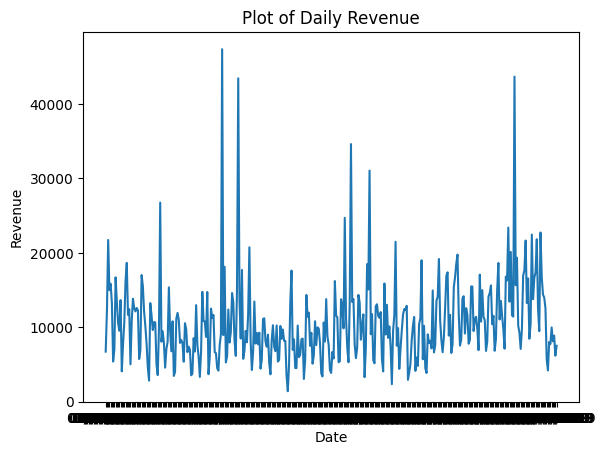

In [67]:
# Create plot (replace with your desired plot type)
plt.plot(df_DailySales["Date"], df_DailySales["DailyRevenue"])
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Plot of Daily Revenue')
plt.ylim(bottom=0) # y začíná na 0
plt.show()

# Výpočet a graf celkových výnosů po měsících

## Výpočet

In [68]:
work_list = []

for month in c_months:
  filtered_df = df_sales[(df_sales['Month'] == month)]
  sum_of_sales = filtered_df['Revenue'].sum()
  work_list.append((month, sum_of_sales))

df_MonthSales = pd.DataFrame.from_records(work_list, columns=['Month', 'MonthRevenue']) # převod listu na data_frame

print(df_MonthSales.to_markdown())

|    | Month   |   MonthRevenue |
|---:|:--------|---------------:|
|  0 | Jan     |         366879 |
|  1 | Feb     |         256633 |
|  2 | Mar     |         259261 |
|  3 | Apr     |         363000 |
|  4 | May     |         252411 |
|  5 | Jun     |         240392 |
|  6 | Jul     |         338576 |
|  7 | Aug     |         331994 |
|  8 | Sep     |         268301 |
|  9 | Oct     |         373345 |
| 10 | Nov     |         422158 |
| 11 | Dec     |         391789 |


## Graf

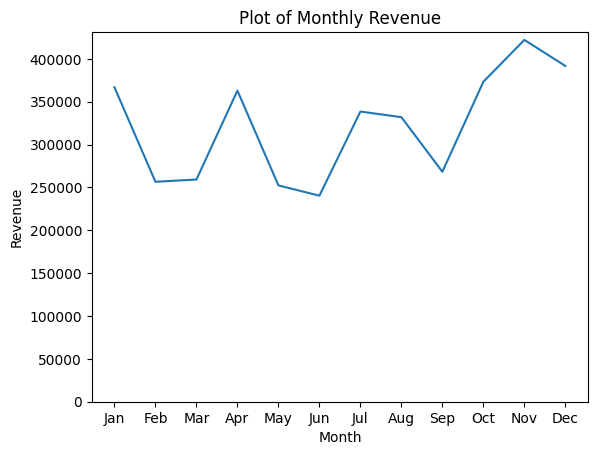

In [70]:
# Create plot (replace with your desired plot type)
plt.plot(df_MonthSales["Month"], df_MonthSales["MonthRevenue"])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Plot of Monthly Revenue')
plt.ylim(bottom=0) # y začíná na 0
plt.show()

## Připojení souboru s marketingovými náklady k df_MonthSales

In [71]:
df_marketing['Month'] = MonthAbrv(df_marketing, 'Date')
df_marketing['Total_Spend'] = df_marketing['Offline_Spend']+df_marketing['Online_Spend']

print(df_marketing.head().to_markdown())

|    | Date       |   Offline_Spend |   Online_Spend | Month   |   Total_Spend |
|---:|:-----------|----------------:|---------------:|:--------|--------------:|
|  0 | 01/01/2019 |            4500 |        2424.5  | Jan     |       6924.5  |
|  1 | 01/02/2019 |            4500 |        3480.36 | Jan     |       7980.36 |
|  2 | 01/03/2019 |            4500 |        1576.38 | Jan     |       6076.38 |
|  3 | 01/04/2019 |            4500 |        2928.55 | Jan     |       7428.55 |
|  4 | 01/05/2019 |            4500 |        4055.3  | Jan     |       8555.3  |


In [72]:
work_list = []

for  month in c_months:
  filtered_df = df_marketing[(df_marketing['Month'] == month)]
  sum_online = filtered_df['Online_Spend'].sum()
  sum_offline = filtered_df['Offline_Spend'].sum()
  sum_total = filtered_df['Total_Spend'].sum()
  work_list.append((month, sum_online, sum_offline, sum_total))

df_MonthlyMarketing = pd.DataFrame.from_records(work_list, columns=['Month', 'Online_Spend', 'Offline_Spend','Total_Spend']) # převod listu na data_frame

print(df_MonthlyMarketing.to_markdown())

|    | Month   |   Online_Spend |   Offline_Spend |   Total_Spend |
|---:|:--------|---------------:|----------------:|--------------:|
|  0 | Jan     |        58329   |           96600 |        154929 |
|  1 | Feb     |        55807.9 |           81300 |        137108 |
|  2 | Mar     |        48750.1 |           73500 |        122250 |
|  3 | Apr     |        61026.8 |           96000 |        157027 |
|  4 | May     |        52759.6 |           65500 |        118260 |
|  5 | Jun     |        53818.1 |           80500 |        134318 |
|  6 | Jul     |        52717.8 |           67500 |        120218 |
|  7 | Aug     |        57404.1 |           85500 |        142904 |
|  8 | Sep     |        52514.5 |           83000 |        135515 |
|  9 | Oct     |        57724.6 |           93500 |        151225 |
| 10 | Nov     |        68145   |           93000 |        161145 |
| 11 | Dec     |        76648.8 |          122000 |        198649 |


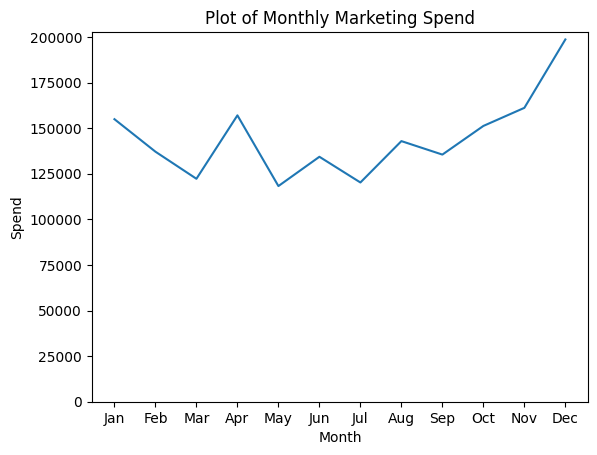

In [73]:
# Create plot (replace with your desired plot type)
plt.plot(df_MonthlyMarketing["Month"], df_MonthlyMarketing["Total_Spend"])
plt.xlabel('Month')
plt.ylabel('Spend')
plt.title('Plot of Monthly Marketing Spend')
plt.ylim(bottom=0) # y začíná na 0
plt.show()

# Tržby po kategoriích a měsících

### Funkční (ale nekonečný) výpočet měsíčních prodejů po kategoriích

In [ ]:
#work_list = []

#for mesic in c_months:
#  for kategorie in c_product_category:
#    CategoryRevenue = 0
#    for i, row in df_sales.iterrows():
#      if row.Product_Category == kategorie and row.Month == mesic:
#        CategoryRevenue += row.Revenue
#    work_list.append((kategorie, mesic, CategoryRevenue)) # append vypočítaný záznam do listu

#    print()
#    slovnik["kategorie"] = kategorie
#    slovnik["mesic"] = mesic
#    slovnik["Sales"] = CategorySales

#df_CatMonSales = pd.DataFrame.from_records(work_list, columns=['kategorie', 'mesic','CategoryRevenue']) # převod listu na data_frame

#print(df_CatMonSales.head().to_markdown())

##Výpočet

In [74]:
work_list = []

for month, category in c_month_categories:
  filtered_df = df_sales[(df_sales['Month'] == month) & (df_sales['Product_Category'] == category)]
  sum_of_sales = filtered_df['Revenue'].sum()
  work_list.append((month, category, sum_of_sales))

df_MonthCategorySales = pd.DataFrame.from_records(work_list, columns=['month', 'category','CategoryRevenue']) # převod listu na data_frame

print(df_MonthCategorySales.head().to_markdown())


|    | month   | category   |   CategoryRevenue |
|---:|:--------|:-----------|------------------:|
|  0 | Jan     | Bottles    |           535.774 |
|  1 | Jan     | Bags       |          9948.57  |
|  2 | Jan     | Fun        |             0     |
|  3 | Jan     | Google     |             0     |
|  4 | Jan     | Android    |            68.466 |


## Graf

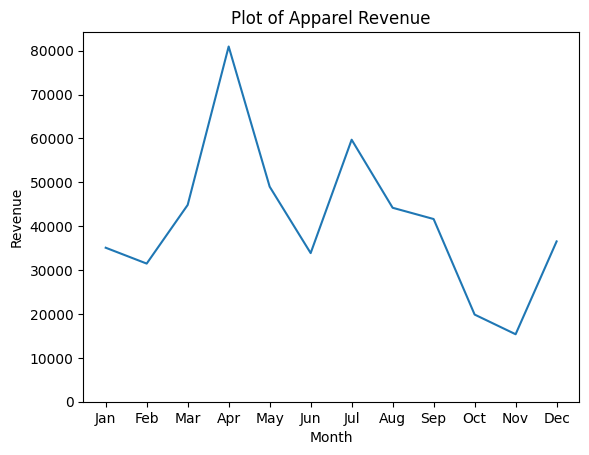

In [75]:
# Specify categories to plot
categories_to_plot = ['Apparel']

# Filter data for desired categories
filtered_data = df_MonthCategorySales[df_MonthCategorySales['category'].isin(categories_to_plot)]

# Create plot (replace with your desired plot type)
plt.plot(filtered_data["month"], filtered_data["CategoryRevenue"])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Plot of Apparel Revenue')
plt.ylim(bottom=0) # y začíná na 0
plt.show()

# Spojit mothly sales a monthly marketing spend do jednoho df a grafu

In [76]:
#Merge Sales a Tax na základe Product_Category
df_SalesMarketing = pd.merge(df_MonthSales,df_MonthlyMarketing, on=["Month"])

print(df_SalesMarketing)

   Month  MonthRevenue  Online_Spend  Offline_Spend  Total_Spend
0    Jan    366879.080      58328.95          96600    154928.95
1    Feb    256632.518      55807.92          81300    137107.92
2    Mar    259261.203      48750.09          73500    122250.09
3    Apr    363000.202      61026.83          96000    157026.83
4    May    252410.914      52759.64          65500    118259.64
5    Jun    240392.257      53818.14          80500    134318.14
6    Jul    338576.358      52717.85          67500    120217.85
7    Aug    331994.114      57404.15          85500    142904.15
8    Sep    268301.389      52514.54          83000    135514.54
9    Oct    373344.944      57724.65          93500    151224.65
10   Nov    422157.618      68144.96          93000    161144.96
11   Dec    391788.737      76648.75         122000    198648.75


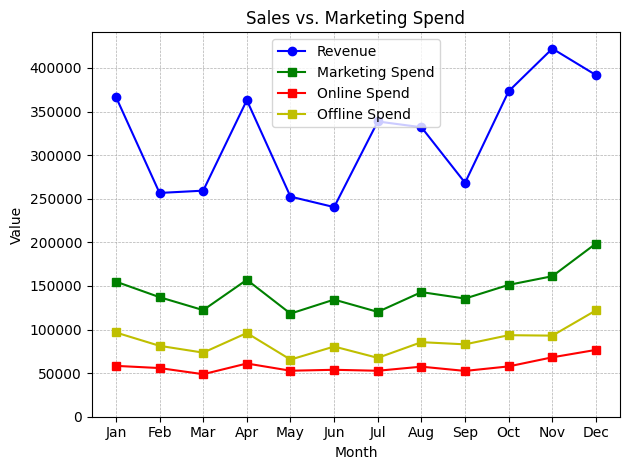

In [77]:
# Plot the first line (Sales)
plt.plot(df_SalesMarketing['Month'], df_SalesMarketing['MonthRevenue'], label='Revenue', marker='o', color='b')

# Plot the second line (Marketing Spend)
plt.plot(df_SalesMarketing['Month'], df_SalesMarketing['Total_Spend'], label='Marketing Spend', marker='s', color='g')

plt.plot(df_SalesMarketing['Month'], df_SalesMarketing['Online_Spend'], label='Online Spend', marker='s', color='r')


plt.plot(df_SalesMarketing['Month'], df_SalesMarketing['Offline_Spend'], label='Offline Spend', marker='s', color='y')


# Add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Sales vs. Marketing Spend')

# Add legend to distinguish lines
plt.legend()

# Optional: Customize gridlines and axes
plt.grid(True, linestyle='--', linewidth=0.5)  # Add gridlines with style and width

plt.tight_layout()  # Adjust spacing between elements
plt.ylim(bottom=0) # y začíná na 0
plt.show()

In [78]:
correlation = df_SalesMarketing['MonthRevenue'].corr(df_SalesMarketing['Total_Spend'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.7271130282356922


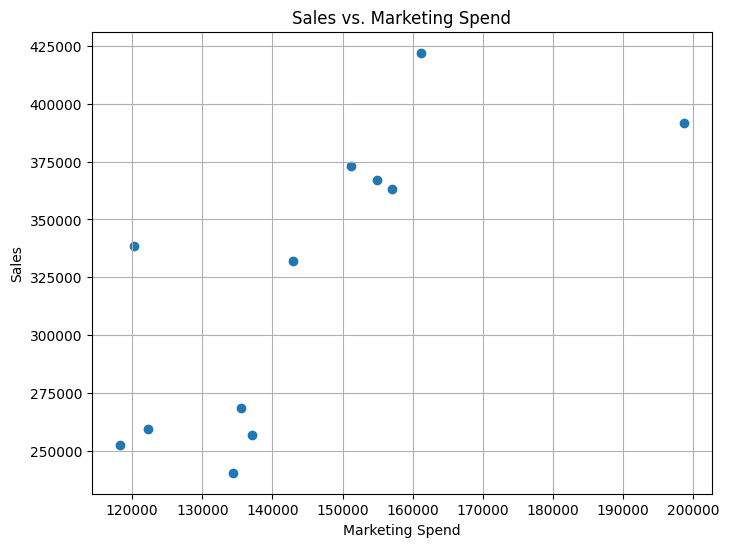

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(df_SalesMarketing['Total_Spend'], df_SalesMarketing['MonthRevenue'])
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.title('Sales vs. Marketing Spend')
plt.grid(True)
# plt.ylim(bottom=0) # y začíná na 0
# plt.xlim(left=0) # x začíná na 0
plt.show()

# RFM (Recency, Frequency, Monetary)

The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. The raw data for doing this, which should be readily available in the company’s CRM or transactional databases, can be compiled in an Excel spreadsheet or database:

    Recency is simply the amount of time since the customer’s most recent transaction (most businesses use days, though for others it might make sense to use months, weeks or even hours instead).
    Frequency is the total number of transactions made by the customer (during a defined period).
    Monetary is the total amount that the customer has spent across all transactions (during a defined period).


In [142]:
df_sales2 = df_sales
df_sales2['Transaction_Date'] = pd.to_datetime(df_sales2['Transaction_Date'],format='%m/%d/%Y')
df_sales2['days_since_transaction'] = (pd.to_datetime('12/31/2019',format='%m/%d/%Y')-df_sales2['Transaction_Date']).dt.days

print(df_sales2.head().to_markdown())
df_sales2.to_csv('df_sales2.csv', index=False)
#print(df_customer.head().to_markdown())

|    |   CustomerID |   Transaction_ID | Transaction_Date    | Product_SKU    | Product_Description                                    | Product_Category   |   Quantity |   Avg_Price |   Delivery_Charges | Coupon_Status   | Month   | Coupon_Code   |   Discount_pct |   Revenue |   days_since_transaction |
|---:|-------------:|-----------------:|:--------------------|:---------------|:-------------------------------------------------------|:-------------------|-----------:|------------:|-------------------:|:----------------|:--------|:--------------|---------------:|----------:|-------------------------:|
|  0 |        17850 |            16679 | 2019-01-01 00:00:00 | GGOENEBJ079499 | Nest Learning Thermostat 3rd Gen-USA - Stainless Steel | Nest-USA           |          1 |      153.71 |                6.5 | Used            | Jan     | ELEC10        |             10 |   138.339 |                      364 |
|  1 |        17850 |            16680 | 2019-01-01 00:00:00 | GGOENEBJ079499 | Ne

In [162]:
  # Group by customer ID and calculate summary statistics
  customer_summary = df_sales2.groupby('CustomerID').agg({
      'days_since_transaction': 'min',  # Days since last transaction (minimum)
      'Transaction_ID': 'nunique',  # Number of unique transaction IDs
      'Revenue': 'sum'  # Total revenue
  })

customer_summary.to_csv('customer_summary.csv', index=False) # uložení csv do runtime pro analýzu, stanovení tier trasholdů

  print(customer_summary.head().to_markdown())

|   CustomerID |   days_since_transaction |   Transaction_ID |   Revenue |
|-------------:|-------------------------:|-----------------:|----------:|
|        12346 |                      107 |                1 |    21.693 |
|        12347 |                       59 |               31 | 11419.7   |
|        12348 |                       73 |                8 |  1146.4   |
|        12350 |                       17 |               11 |  1053.93  |
|        12356 |                      107 |               13 |  1106.34  |


In [183]:
customer_summary['R_Tier'] = None
customer_summary['F_Tier'] = None
customer_summary['M_Tier'] = None
customer_summary['Segment'] = None

for i, row in customer_summary.iterrows():
      if row.days_since_transaction >= 270:
        customer_summary.loc[i, 'R_Tier'] = 4
      elif row.days_since_transaction >= 180:
        customer_summary.loc[i, 'R_Tier'] = 3
      elif row.days_since_transaction >= 90:
        customer_summary.loc[i, 'R_Tier'] = 2
      else:
        customer_summary.loc[i, 'R_Tier'] = 1

for i, row in customer_summary.iterrows():
      if row.Transaction_ID == 1:
        customer_summary.loc[i, 'F_Tier'] = 4
      elif row.Transaction_ID <= 5:
        customer_summary.loc[i, 'F_Tier'] = 3
      elif row.Transaction_ID <= 20:
        customer_summary.loc[i, 'F_Tier'] = 2
      else:
        customer_summary.loc[i, 'F_Tier'] = 1

for i, row in customer_summary.iterrows():
      if row.Revenue >= 8000:
        customer_summary.loc[i, 'M_Tier'] = 1
      elif row.Revenue >= 4000:
        customer_summary.loc[i, 'M_Tier'] = 2
      elif row.Revenue >= 300:
        customer_summary.loc[i, 'M_Tier'] = 3
      else:
        customer_summary.loc[i, 'M_Tier'] = 4

print(customer_summary.head().to_markdown())

|   CustomerID |   days_since_transaction |   Transaction_ID |   Revenue |   R_Tier |   F_Tier |   M_Tier | Segment   |
|-------------:|-------------------------:|-----------------:|----------:|---------:|---------:|---------:|:----------|
|        12346 |                      107 |                1 |    21.693 |        2 |        4 |        4 |           |
|        12347 |                       59 |               31 | 11419.7   |        1 |        1 |        1 |           |
|        12348 |                       73 |                8 |  1146.4   |        1 |        2 |        3 |           |
|        12350 |                       17 |               11 |  1053.93  |        1 |        2 |        3 |           |
|        12356 |                      107 |               13 |  1106.34  |        2 |        2 |        3 |           |


In [185]:
#Segmentation

for i, row in customer_summary.iterrows():
      if row.R_Tier == 1 and row.F_Tier == 1 and row.M_Tier == 1:
        customer_summary.loc[i, 'Segment'] = 'Platinum'
      elif row.R_Tier == 1 and row.F_Tier == 4 and row.M_Tier in (1,2,3):
        customer_summary.loc[i, 'Segment'] = 'New Customers'
      elif row.R_Tier == 1 and row.F_Tier == 1 and row.M_Tier in(3,4):
        customer_summary.loc[i, 'Segment'] = 'Loyal Customers'
      elif row.R_Tier == 4 and row.F_Tier in(1,2) and row.M_Tier in (1,2):
         customer_summary.loc[i, 'Segment'] = 'Best Churned'
      else:
        customer_summary.loc[i, 'Segment'] = 'None'

print(customer_summary.head().to_markdown())

|   CustomerID |   days_since_transaction |   Transaction_ID |   Revenue |   R_Tier |   F_Tier |   M_Tier | Segment   |
|-------------:|-------------------------:|-----------------:|----------:|---------:|---------:|---------:|:----------|
|        12346 |                      107 |                1 |    21.693 |        2 |        4 |        4 | None      |
|        12347 |                       59 |               31 | 11419.7   |        1 |        1 |        1 | Platinum  |
|        12348 |                       73 |                8 |  1146.4   |        1 |        2 |        3 | None      |
|        12350 |                       17 |               11 |  1053.93  |        1 |        2 |        3 | None      |
|        12356 |                      107 |               13 |  1106.34  |        2 |        2 |        3 | None      |


In [181]:
print(customer_summary.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 12346 to 18283
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   days_since_transaction  1468 non-null   int64  
 1   Transaction_ID          1468 non-null   int64  
 2   Revenue                 1468 non-null   float64
 3   R_Tier                  1468 non-null   object 
 4   F_Tier                  1468 non-null   object 
 5   M_Tier                  1468 non-null   object 
 6   Segment                 1468 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 124.0+ KB
None


In [186]:
  # Group by customer ID and calculate summary statistics
  segment_summary = customer_summary.groupby('Segment').agg({
      #'CustomerID': 'nunique',  # Days since last transaction (minimum)
      'Transaction_ID': 'sum',  # Number of unique transaction IDs
      'Revenue': 'sum'  # Total revenue
  })

print(segment_summary.to_markdown())

| Segment         |   Transaction_ID |          Revenue |
|:----------------|-----------------:|-----------------:|
| Best Churned    |             1085 | 196789           |
| Loyal Customers |             1688 | 206392           |
| New Customers   |                3 |   2156.66        |
| None            |            18208 |      2.53693e+06 |
| Platinum        |             5580 | 922468           |
